In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [2]:
?filterwarnings

Object `filterwarnings` not found.


In [3]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [4]:
all_data.shape

(10000, 55)

In [5]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=1)
# обучение модели
clf.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = clf.predict(test_feature_matrix)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

In [11]:
from sklearn.model_selection import GridSearchCV

In [20]:
# # заново создадим модель, указав солвер
# clf = LogisticRegression(solver='saga')
# 
# # опишем сетку, по которой будем искать
# param_grid = {
#     'C': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
#     'penalty': ['l1', 'l2'],
# }
# 
# # создадим объект GridSearchCV
# search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')
# 
# # запустим поиск
# search.fit(feature_matrix, labels)
# 
# # выведем наилучшие параметры
# print(search.best_params_)

In [13]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6419

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.7365

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [i for i in range(1, 11)],
          'weights': ['uniform', 'distance'],
          'metric': ['manhattan', 'euclidean']}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)
y_pred = clf_grid.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.785

In [16]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [17]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

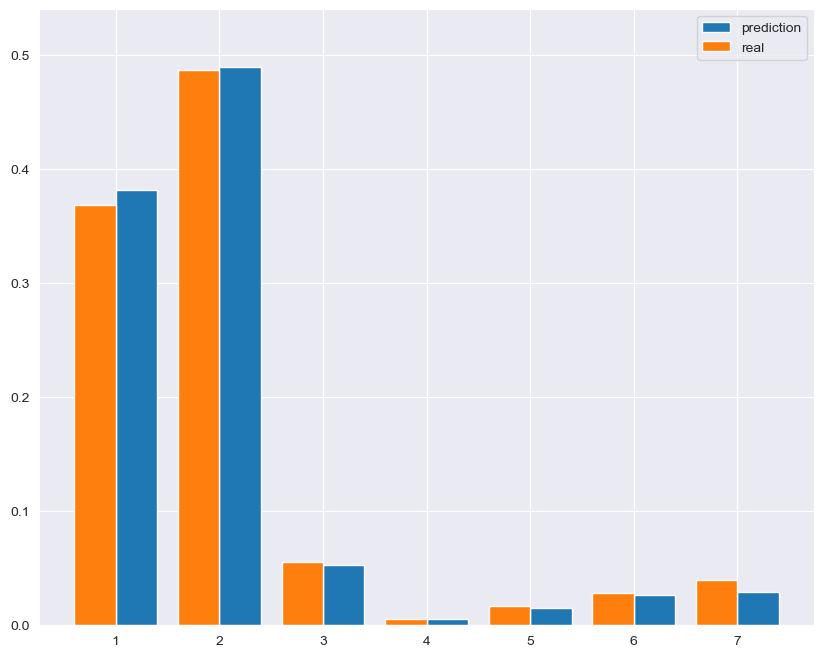

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [19]:
freq[2]

0.0555